In [1]:
pip install pot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 14.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import ot
from mpl_toolkits.mplot3d import Axes3D
import cv2
import os
from PIL import Image

## Simple data

<ipython-input-3-9526eb6e6808>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


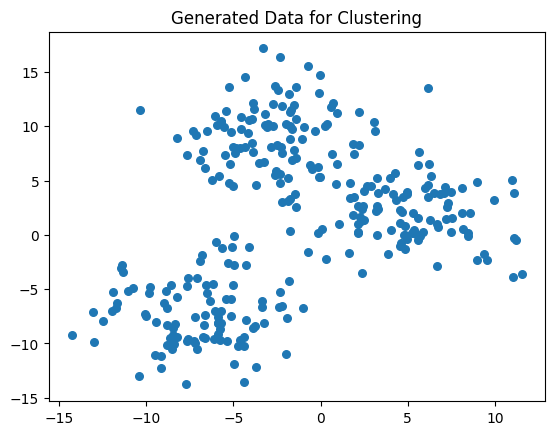

In [3]:
n_samples = 300
X, true_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Generated Data for Clustering')
plt.show()

In [4]:
def emd_distance(X, Y):
    M = np.abs(X[:, None] - Y[None, :])
    return ot.emd2(np.ones(len(X)) / len(X), np.ones(len(Y)) / len(Y), M)

def euclidean_distance(X, Y):
    return np.linalg.norm(X - Y)

def kmeans(X, k=3, max_iter=100, distance_metric="euclidean"):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iteration in range(max_iter):
        labels = []
        for i in range(X.shape[0]):
            distances = []
            for j in range(k):
                if distance_metric == "emd":
                    distances.append(emd_distance(X[i], centroids[j]))
                else:
                    distances.append(euclidean_distance(X[i], centroids[j]))
            closest_centroid = np.argmin(distances)
            labels.append(closest_centroid)
        labels = np.array(labels)
        new_centroids = np.zeros_like(centroids)
        for j in range(k):
            cluster_points = X[labels == j]
            if cluster_points.shape[0] > 0:
                if distance_metric == "emd":
                    distances = np.array([np.sum([emd_distance(cluster_points[i], cluster_points[j]) for j in range(cluster_points.shape[0])])
                                          for i in range(cluster_points.shape[0])])
                    new_centroids[j] = cluster_points[np.argmin(distances)]
                else:
                    new_centroids[j] = np.mean(cluster_points, axis=0)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels

0.41912652502677367 0.9217357462672372


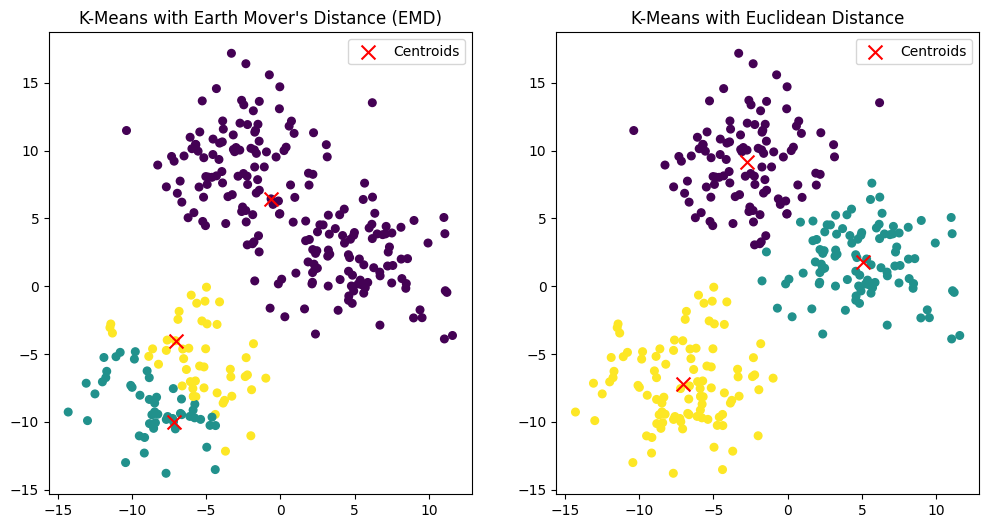

In [5]:
centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")

ari1 = adjusted_rand_score(labels_emd, true_labels)
ari2 = adjusted_rand_score(labels_euclidean, true_labels)
print(ari1, ari2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_emd, s=30, cmap='viridis')
plt.scatter(centroids_emd[:, 0], centroids_emd[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.title('K-Means with Earth Mover\'s Distance (EMD)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_euclidean, s=30, cmap='viridis')
plt.scatter(centroids_euclidean[:, 0], centroids_euclidean[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.title('K-Means with Euclidean Distance')
plt.legend()

plt.show()

<ipython-input-6-005aad82354e>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=30, cmap='viridis')


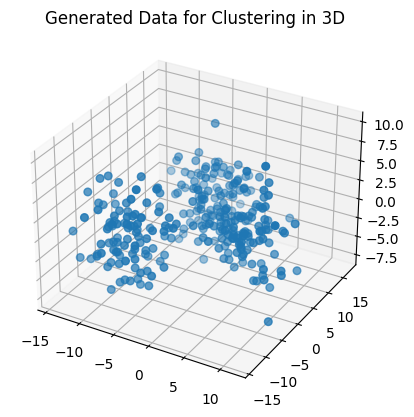

In [6]:
n_samples = 300
X, true_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=3, random_state=42)
X = np.hstack((X, np.random.randn(n_samples, 1) * 3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=30, cmap='viridis')
ax.set_title('Generated Data for Clustering in 3D')
plt.show()

0.5761076718227099 0.9217357462672372


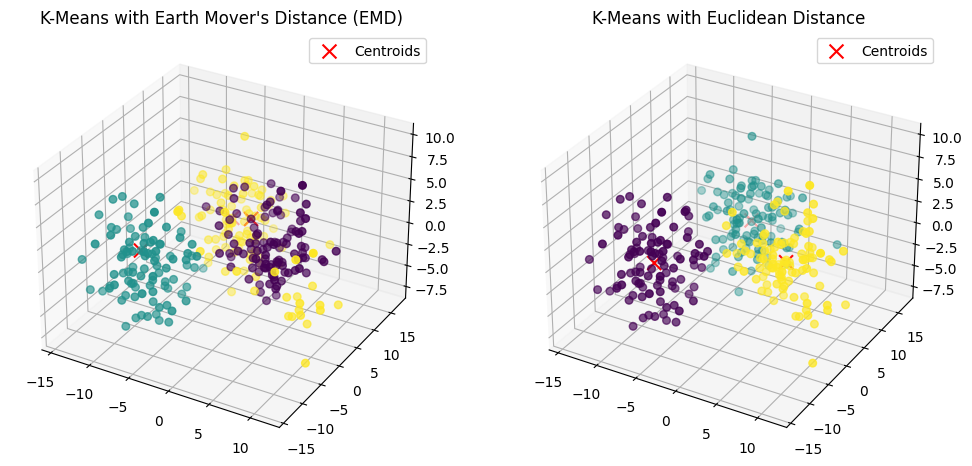

In [7]:
centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")

ari1 = adjusted_rand_score(labels_emd, true_labels)
ari2 = adjusted_rand_score(labels_euclidean, true_labels)
print(ari1, ari2)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_emd, s=30, cmap='viridis')
ax1.scatter(centroids_emd[:, 0], centroids_emd[:, 1], centroids_emd[:, 2], color='red', marker='x', s=100, label="Centroids")
ax1.set_title('K-Means with Earth Mover\'s Distance (EMD)')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_euclidean, s=30, cmap='viridis')
ax2.scatter(centroids_euclidean[:, 0], centroids_euclidean[:, 1], centroids_euclidean[:, 2], color='red', marker='x', s=100, label="Centroids")
ax2.set_title('K-Means with Euclidean Distance')
ax2.legend()

plt.show()

In [8]:
n_samples = 300
X, true_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=3, n_features=100, random_state=42)

In [9]:
centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")

ari1 = adjusted_rand_score(labels_emd, true_labels)
ari2 = adjusted_rand_score(labels_euclidean, true_labels)
print(ari1, ari2)

0.3603508697157948 1.0


The Euclidean Distance simply outperformed EMD, maybe because:
- The clusters are well-separated and roughly spherical or uniformly shaped.
- The data does not require the sophisticated, distribution-sensitive comparison that EMD provides.
  
Next, i will test with a "distribution-sensitive" dataset (Text or Image).

## Image

In [10]:
def load_and_show_images(folder_path):
    image_files = [f for f in os.listdir(folder_path)]

    num_images = len(image_files)
    cols = 7
    rows = (num_images + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 2 * rows))
    axes = axes.flatten()

    for idx, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path)
        img = img.resize((128, 128))
        axes[idx].imshow(img)
        axes[idx].set_title(image_file)
        axes[idx].axis('off')

    for ax in axes[len(image_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

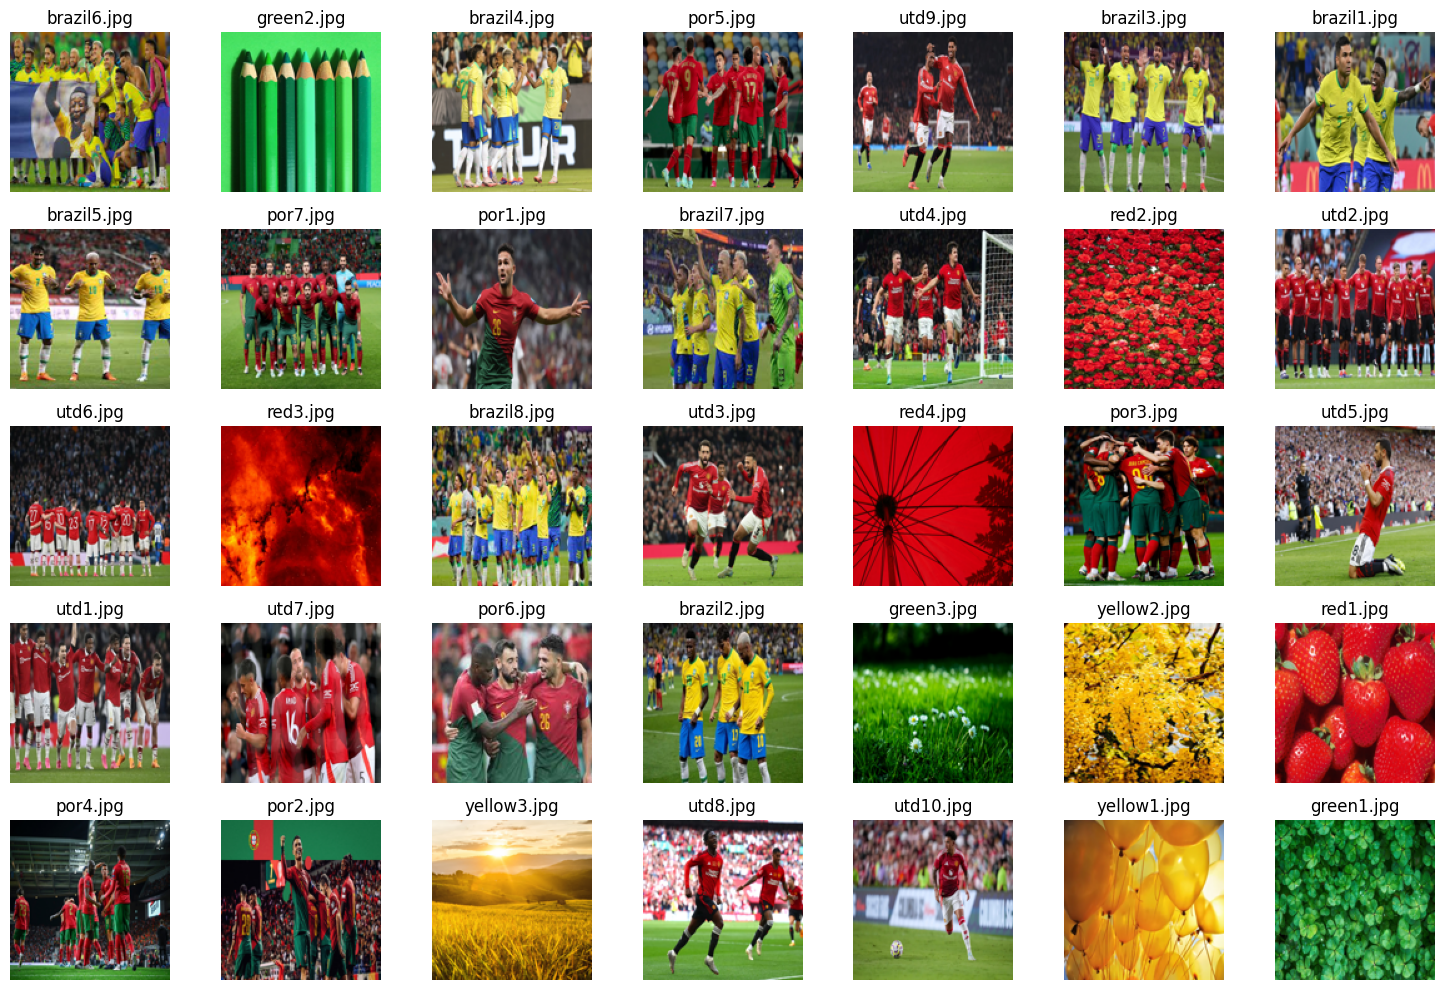

In [11]:
load_and_show_images('/kaggle/input/images/images')

In [12]:
def create_histogram_dataset(folder_path, output_file):
    image_files = [f for f in os.listdir(folder_path)]
    dataset = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        img = Image.open(image_path).convert('RGB')
        img = img.resize((32, 32))
        
        histogram = []
        for channel in range(3):
            channel_data = np.array(img.getchannel(channel))
            channel_hist, _ = np.histogram(channel_data, bins=100, range=(0, 256))
            histogram.extend(channel_hist)
            
        histogram = np.array(histogram)
        # histogram = histogram / histogram.sum()

        dataset.append([image_file] + histogram.tolist())

    column_names = ['filename'] + [f'bin_{i}' for i in range(len(dataset[0]) - 1)]
    df = pd.DataFrame(dataset, columns=column_names)
    df.to_csv(output_file, index=False)
    print(f"Dataset saved to {output_file}")

create_histogram_dataset('/kaggle/input/images/images', 'output.csv')

Dataset saved to output.csv


In [13]:
data = pd.read_csv('output.csv')
label_dict = {'utd': 0, 'brazil': 1, 'por': 2}
data.insert(0, 'label', data['filename'].apply(lambda x: next((label for key, label in label_dict.items() if key in x), 3)))
data = data[data['label'] != 3]
data.head()

,label,filename,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,...,bin_290,bin_291,bin_292,bin_293,bin_294,bin_295,bin_296,bin_297,bin_298,bin_299
0,1,brazil6.jpg,1,1,1,1,3,5,3,6,...,0,0,0,0,0,0,0,0,0,0
2,1,brazil4.jpg,0,0,0,0,0,1,0,1,...,5,8,2,1,2,6,2,0,3,13
3,2,por5.jpg,29,9,10,24,22,11,10,22,...,0,0,0,0,0,0,0,0,0,0
4,0,utd9.jpg,0,0,0,0,1,0,1,1,...,1,1,0,1,1,0,0,0,0,0
5,1,brazil3.jpg,0,0,0,0,0,0,1,0,...,1,0,0,1,2,0,0,0,1,3


In [14]:
X = data.iloc[:, 2:].values 
for i in range(10):
    centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
    centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")
    true_labels = data['label']
    ari1 = adjusted_rand_score(labels_emd, true_labels)
    ari2 = adjusted_rand_score(labels_euclidean, true_labels)
    print(ari1, ari2, "EMD" if ari1 > ari2 else "Euclidean")

0.1520290732889158 0.21083978558665872 Euclidean
0.1520290732889158 0.3263034563561804 Euclidean
0.06610649929135452 0.1544047391553602 Euclidean
0.053214216352689844 0.3263034563561804 Euclidean
0.05802228905006191 0.2741485203796762 Euclidean
0.1520290732889158 0.04194717762817193 EMD
0.1520290732889158 0.14294618740910037 EMD
0.081070042883398 0.2530755711775044 Euclidean
0.1520290732889158 0.07631738340399757 EMD
0.1520290732889158 0.06265021631148854 EMD


The result is not good, maybe my idea is wrong?